In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.metrics import geometric_mean_score
import gc

In [2]:
df_train = pd.read_csv("Prototype/Data/train_combined.csv")

In [3]:
y_train = df_train["isFraud"]
X_train = df_train.drop(columns=["isFraud"])

In [4]:
del df_train
gc.collect()

3447

In [5]:
X_train

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
X_train_C_features = X_train.filter(regex="^C")
X_train_C_features

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0
590536,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
590537,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
590538,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0


In [7]:
X_train = X_train.drop(columns=X_train_C_features.columns)
X_train

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
null_percent = X_train.isnull().mean() * 100
cols_with_high_null = null_percent[null_percent >= 90].index.tolist()
print("Columns with 90% or more null values:")
cols_with_high_null

Columns with 90% or more null values:


['dist2',
 'D7',
 'id_07',
 'id_08',
 'id_18',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27']

In [9]:
X_train = X_train.drop(columns=cols_with_high_null)
X_train

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
id_cols = ["TransactionID", "TransactionDT"]
target = "isFraud"

numerical_features = X_train.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
numerical_features = [col for col in numerical_features if col not in id_cols]
cat_cols = [col for col in cat_cols if col not in id_cols]
categorical_features = [col for col in cat_cols if col not in target]

print("Total Columns: ", len(numerical_features) + len(categorical_features))
print("Numerical Columns: ", numerical_features)
print("Categorical Columns: ", categorical_features)

Total Columns:  405
Numerical Columns:  ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    label_encoders[col] = le

In [46]:
X_train

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,86400,68.50,4,13926,NaN,150.0,1,142.0,1,...,130,NaN,260,4,2,2,2,2,2,1786
1,2987001,86401,29.00,4,2755,404.0,150.0,2,102.0,1,...,130,NaN,260,4,2,2,2,2,2,1786
2,2987002,86469,59.00,4,4663,490.0,150.0,3,166.0,2,...,130,NaN,260,4,2,2,2,2,2,1786
3,2987003,86499,50.00,4,18132,567.0,150.0,2,117.0,2,...,130,NaN,260,4,2,2,2,2,2,1786
4,2987004,86506,50.00,1,4497,514.0,150.0,2,102.0,1,...,123,32.0,164,3,1,0,1,1,1,954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,15811047,49.00,4,6550,NaN,150.0,3,226.0,2,...,130,NaN,260,4,2,2,2,2,2,1786
590536,3577536,15811049,39.50,4,10444,225.0,150.0,2,224.0,2,...,130,NaN,260,4,2,2,2,2,2,1786
590537,3577537,15811079,30.95,4,12037,595.0,150.0,2,224.0,2,...,130,NaN,260,4,2,2,2,2,2,1786
590538,3577538,15811088,117.00,4,7826,481.0,150.0,2,224.0,2,...,130,NaN,260,4,2,2,2,2,2,1786


In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_train_imputed = imputer.fit_transform(X_train)

In [48]:
X_train

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,86400,68.50,4,13926,NaN,150.0,1,142.0,1,...,130,NaN,260,4,2,2,2,2,2,1786
1,2987001,86401,29.00,4,2755,404.0,150.0,2,102.0,1,...,130,NaN,260,4,2,2,2,2,2,1786
2,2987002,86469,59.00,4,4663,490.0,150.0,3,166.0,2,...,130,NaN,260,4,2,2,2,2,2,1786
3,2987003,86499,50.00,4,18132,567.0,150.0,2,117.0,2,...,130,NaN,260,4,2,2,2,2,2,1786
4,2987004,86506,50.00,1,4497,514.0,150.0,2,102.0,1,...,123,32.0,164,3,1,0,1,1,1,954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,15811047,49.00,4,6550,NaN,150.0,3,226.0,2,...,130,NaN,260,4,2,2,2,2,2,1786
590536,3577536,15811049,39.50,4,10444,225.0,150.0,2,224.0,2,...,130,NaN,260,4,2,2,2,2,2,1786
590537,3577537,15811079,30.95,4,12037,595.0,150.0,2,224.0,2,...,130,NaN,260,4,2,2,2,2,2,1786
590538,3577538,15811088,117.00,4,7826,481.0,150.0,2,224.0,2,...,130,NaN,260,4,2,2,2,2,2,1786


In [13]:
X_train_imputed

array([[2.9870000e+06, 8.6400000e+04, 6.8500000e+01, ..., 2.0000000e+00,
        2.0000000e+00, 1.7860000e+03],
       [2.9870010e+06, 8.6401000e+04, 2.9000000e+01, ..., 2.0000000e+00,
        2.0000000e+00, 1.7860000e+03],
       [2.9870020e+06, 8.6469000e+04, 5.9000000e+01, ..., 2.0000000e+00,
        2.0000000e+00, 1.7860000e+03],
       ...,
       [3.5775370e+06, 1.5811079e+07, 3.0950000e+01, ..., 2.0000000e+00,
        2.0000000e+00, 1.7860000e+03],
       [3.5775380e+06, 1.5811088e+07, 1.1700000e+02, ..., 2.0000000e+00,
        2.0000000e+00, 1.7860000e+03],
       [3.5775390e+06, 1.5811131e+07, 2.7995000e+02, ..., 2.0000000e+00,
        2.0000000e+00, 1.7860000e+03]], shape=(590540, 407))

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

In [15]:
X_train_scaled

array([[-1.73204787, -1.57798669, -0.27816747, ...,  0.52426641,
         0.52828872,  0.32536445],
       [-1.73204201, -1.57798648, -0.44332726, ...,  0.52426641,
         0.52828872,  0.32536445],
       [-1.73203614, -1.57797175, -0.31788944, ...,  0.52426641,
         0.52828872,  0.32536445],
       ...,
       [ 1.73203614,  1.82767297, -0.4351738 , ...,  0.52426641,
         0.52828872,  0.32536445],
       [ 1.73204201,  1.82767491, -0.07537632, ...,  0.52426641,
         0.52828872,  0.32536445],
       [ 1.73204787,  1.82768423,  0.6059601 , ...,  0.52426641,
         0.52828872,  0.32536445]], shape=(590540, 407))

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)

In [17]:
import numpy as np
import pandas as pd

loadings = pca.components_.T
feature_names = X_train.columns

importance_scores = np.sum(np.abs(loadings), axis=1)

feature_ranks = pd.Series(importance_scores, index=feature_names).sort_values(ascending=False)

top_n = 100
top_features = feature_ranks.head(top_n).index.tolist()
top_features

['D3',
 'D5',
 'D8',
 'id_06',
 'id_05',
 'V286',
 'D13',
 'D14',
 'id_20',
 'DeviceInfo',
 'id_01',
 'card6',
 'TransactionAmt',
 'V138',
 'id_13',
 'P_emaildomain',
 'id_02',
 'D11',
 'addr2',
 'id_14',
 'V173',
 'V281',
 'V220',
 'id_11',
 'V325',
 'id_32',
 'V98',
 'V283',
 'D10',
 'V24',
 'id_10',
 'V107',
 'id_19',
 'V288',
 'V169',
 'V289',
 'card5',
 'V3',
 'V7',
 'V55',
 'V56',
 'V174',
 'V23',
 'V121',
 'V109',
 'V46',
 'D12',
 'V142',
 'card2',
 'D2',
 'D9',
 'V54',
 'V36',
 'V301',
 'V53',
 'V6',
 'V4',
 'V62',
 'V35',
 'V5',
 'card4',
 'V47',
 'V83',
 'card3',
 'V13',
 'D1',
 'V67',
 'V130',
 'V300',
 'V123',
 'V114',
 'V37',
 'V12',
 'V87',
 'V75',
 'V2',
 'V26',
 'V86',
 'D6',
 'V208',
 'V184',
 'V25',
 'V76',
 'id_03',
 'V116',
 'V38',
 'V115',
 'V260',
 'V14',
 'V108',
 'D4',
 'V9',
 'id_04',
 'V68',
 'V198',
 'V77',
 'V110',
 'V141',
 'V251',
 'V122']

In [18]:
X_train_reduced = X_train[top_features]

In [19]:
X_train_reduced

,D3,D5,D8,id_06,id_05,V286,D13,D14,id_20,DeviceInfo,...,D4,V9,id_04,V68,V198,V77,V110,V141,V251,V122
0,13.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1786,...,NaN,1.0,NaN,0.0,NaN,1.0,1.0,NaN,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1786,...,0.0,NaN,NaN,0.0,NaN,1.0,1.0,NaN,NaN,1.0
2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1786,...,0.0,1.0,NaN,0.0,NaN,1.0,1.0,NaN,NaN,1.0
3,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1786,...,94.0,NaN,NaN,0.0,NaN,1.0,1.0,NaN,NaN,1.0
4,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,144.0,954,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,30.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1786,...,NaN,1.0,NaN,0.0,NaN,1.0,1.0,NaN,NaN,1.0
590536,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1786,...,0.0,1.0,NaN,0.0,NaN,1.0,1.0,NaN,NaN,1.0
590537,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1786,...,0.0,1.0,NaN,0.0,NaN,1.0,1.0,NaN,NaN,1.0
590538,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1786,...,22.0,1.0,NaN,0.0,NaN,1.0,1.0,NaN,NaN,1.0


In [20]:
from sklearn.model_selection import train_test_split


X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_reduced, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [23]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, n_jobs=-1
)

model.fit(X_train_final, y_train_final)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [24]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print(geometric_mean_score(y_val, y_pred))
confusion_matrix(y_val, y_pred)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113975
           1       0.88      0.31      0.46      4133

    accuracy                           0.97    118108
   macro avg       0.93      0.66      0.72    118108
weighted avg       0.97      0.97      0.97    118108

0.5601813715218715


array([[113795,    180],
       [  2834,   1299]])

Fine Tuning

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "scale_pos_weight": [1, 5, 10, 20],  
}

xgb_clf = XGBClassifier(random_state=42, n_jobs=-1)

search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=params,
    n_iter=20,
    scoring="f1",  
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1,
)

search.fit(X_train_final, y_train_final)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300],
                                        'scale_pos_weight': [1, 5, 10, 20],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [26]:
print("Best parameters found: ", search.best_params_)

Best parameters found:  {'subsample': 0.6, 'scale_pos_weight': 5, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 1.0}


In [30]:
best_model = search.best_estimator_
y_pred = best_model.predict(X_val)
print(classification_report(y_val, y_pred))
print("Geometric Mean: ", geometric_mean_score(y_val, y_pred))
confusion_matrix(y_val, y_pred)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    113975
           1       0.74      0.56      0.64      4133

    accuracy                           0.98    118108
   macro avg       0.86      0.78      0.81    118108
weighted avg       0.98      0.98      0.98    118108

Geometric Mean:  0.7469275000942249


array([[113180,    795],
       [  1811,   2322]])

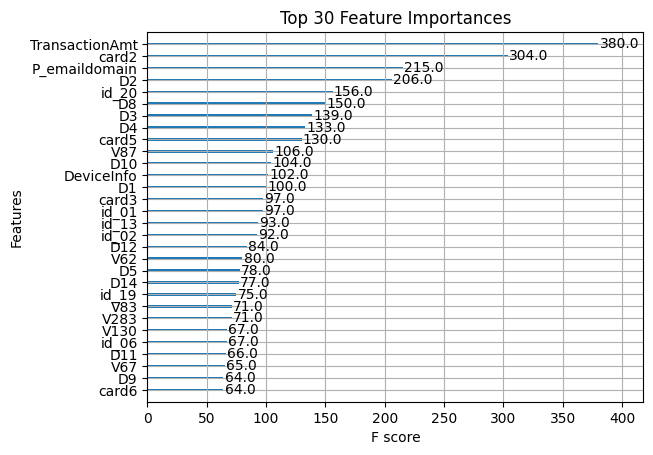

In [37]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model, max_num_features=30, importance_type="weight")
plt.title("Top 30 Feature Importances")
plt.show()